My work is greatly inspired by the written paper by Tengfei Song et al avalailable [here](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8320798&tag=1).

### Data exploration

In [2]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

#### Gather all files

In [3]:
import os 
print(os.getcwd())
path = r'C:\Users\harol\UsefulCode\CP_DSAI\Project\Dataset\SEED\Preprocessed_EEG'
list_mat_pre = os.listdir(path)
with open(path + '\\' + 'readme.txt') as readme :
    for line in readme:
        print(line)
readme.close()
list_mat_pre.remove('readme.txt')
#list_mat_file contains all interessant files for our research
list_mat_pre

C:\Users\harol\UsefulCode\CP_DSAI\Project
There are fifiteen trials for each experiment. The labels of all trials are 1,0,-1,-1,0,1,-1,0,1,1,0,-1,0,1,-1, where 1 for positive, 0 for neutral and -1 for negative.

For more detailed description of this dataset, please see http://bcmi.sjtu.edu.cn/~seed/



If you use this dataset, please cite the following paper:

"Investigating Critical Frequency Bands and Channels for EEG-based Emotion Recognition with Deep Neural Networks", Wei-Long Zheng, and Bao-Liang Lu, IEEE Transactions on Autonomous Mental Development (IEEE TAMD), 2015.


['10_20131130.mat',
 '10_20131204.mat',
 '10_20131211.mat',
 '11_20140618.mat',
 '11_20140625.mat',
 '11_20140630.mat',
 '12_20131127.mat',
 '12_20131201.mat',
 '12_20131207.mat',
 '13_20140527.mat',
 '13_20140603.mat',
 '13_20140610.mat',
 '14_20140601.mat',
 '14_20140615.mat',
 '14_20140627.mat',
 '15_20130709.mat',
 '15_20131016.mat',
 '15_20131105.mat',
 '1_20131027.mat',
 '1_20131030.mat',
 '1_20131107.mat',
 '2_20140404.mat',
 '2_20140413.mat',
 '2_20140419.mat',
 '3_20140603.mat',
 '3_20140611.mat',
 '3_20140629.mat',
 '4_20140621.mat',
 '4_20140702.mat',
 '4_20140705.mat',
 '5_20140411.mat',
 '5_20140418.mat',
 '5_20140506.mat',
 '6_20130712.mat',
 '6_20131016.mat',
 '6_20131113.mat',
 '7_20131027.mat',
 '7_20131030.mat',
 '7_20131106.mat',
 '8_20140511.mat',
 '8_20140514.mat',
 '8_20140521.mat',
 '9_20140620.mat',
 '9_20140627.mat',
 '9_20140704.mat',
 'label.mat']

In [4]:
label_ = loadmat(path + '\\' + list_mat_pre[-1])
label_['label']

array([[ 1,  0, -1, -1,  0,  1, -1,  0,  1,  1,  0, -1,  0,  1, -1]],
      dtype=int16)

#### Load .mat file 

In [5]:
from scipy.io import loadmat
ex = list_mat_pre[0]
print(ex)
data_pre = loadmat(path +'\\' + ex)
print(data_pre.keys())

10_20131130.mat
dict_keys(['__header__', '__version__', '__globals__', 'ww_eeg1', 'ww_eeg2', 'ww_eeg3', 'ww_eeg4', 'ww_eeg5', 'ww_eeg6', 'ww_eeg7', 'ww_eeg8', 'ww_eeg9', 'ww_eeg10', 'ww_eeg11', 'ww_eeg12', 'ww_eeg13', 'ww_eeg14', 'ww_eeg15'])


In [133]:
print(data_pre['ww_eeg2'].shape)

(62, 46601)


Each experiment was conducted with 15 sequeces videos, that's why we got 15 ww_eeg. For each experiment, 62 channels was used as EEG system, that's why each file ww_eeg got 62 rows. Each rows correspond to a channel. 

The order of the channel in the numpy array is the same than in an excel file given with the dataset

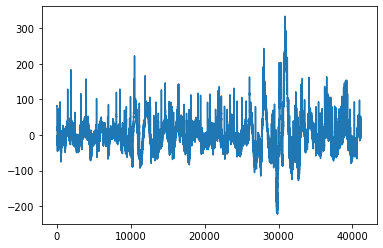

In [6]:
eeg15 = data_pre['ww_eeg15']
plt.plot(eeg15[1, :])
plt.show()

# Exctracted Features

In [3]:
import os
path2 = r'C:\Users\harol\UsefulCode\CP_DSAI\Project\Dataset\SEED\ExtractedFeatures'
list_mat_ex = os.listdir(path2)
with open(path2 + '\\' + 'readme.txt') as readme :
    for line in readme:
        print(line)
readme.close()
#list_mat_ex.remove('readme.txt')
#list_mat_file contains all interessant files for our research
list_mat_ex.remove('readme.txt')
#list_mat_file contains all interessant files for our research
list_mat_ex

For more detailed description of this dataset, please see http://bcmi.sjtu.edu.cn/~seed/



If you use this dataset, please cite the following paper:

"Investigating Critical Frequency Bands and Channels for EEG-based Emotion Recognition with Deep Neural Networks", Wei-Long Zheng, and Bao-Liang Lu, IEEE Transactions on Autonomous Mental Development (IEEE TAMD), 2015.


['10_20131130.mat',
 '10_20131204.mat',
 '10_20131211.mat',
 '11_20140618.mat',
 '11_20140625.mat',
 '11_20140630.mat',
 '12_20131127.mat',
 '12_20131201.mat',
 '12_20131207.mat',
 '13_20140527.mat',
 '13_20140603.mat',
 '13_20140610.mat',
 '14_20140601.mat',
 '14_20140615.mat',
 '14_20140627.mat',
 '15_20130709.mat',
 '15_20131016.mat',
 '15_20131105.mat',
 '1_20131027.mat',
 '1_20131030.mat',
 '1_20131107.mat',
 '2_20140404.mat',
 '2_20140413.mat',
 '2_20140419.mat',
 '3_20140603.mat',
 '3_20140611.mat',
 '3_20140629.mat',
 '4_20140621.mat',
 '4_20140702.mat',
 '4_20140705.mat',
 '5_20140411.mat',
 '5_20140418.mat',
 '5_20140506.mat',
 '6_20130712.mat',
 '6_20131016.mat',
 '6_20131113.mat',
 '7_20131027.mat',
 '7_20131030.mat',
 '7_20131106.mat',
 '8_20140511.mat',
 '8_20140514.mat',
 '8_20140521.mat',
 '9_20140620.mat',
 '9_20140627.mat',
 '9_20140704.mat',
 'label.mat']

In [4]:
from scipy.io import loadmat
ex = list_mat_ex[0]
print(ex)
data_ex = loadmat(path2 +'\\' + ex)
print(data_ex.keys())

10_20131130.mat
dict_keys(['__header__', '__version__', '__globals__', 'de_movingAve1', 'de_LDS1', 'psd_movingAve1', 'psd_LDS1', 'dasm_movingAve1', 'dasm_LDS1', 'rasm_movingAve1', 'rasm_LDS1', 'asm_movingAve1', 'asm_LDS1', 'dcau_movingAve1', 'dcau_LDS1', 'de_movingAve2', 'de_LDS2', 'psd_movingAve2', 'psd_LDS2', 'dasm_movingAve2', 'dasm_LDS2', 'rasm_movingAve2', 'rasm_LDS2', 'asm_movingAve2', 'asm_LDS2', 'dcau_movingAve2', 'dcau_LDS2', 'de_movingAve3', 'de_LDS3', 'psd_movingAve3', 'psd_LDS3', 'dasm_movingAve3', 'dasm_LDS3', 'rasm_movingAve3', 'rasm_LDS3', 'asm_movingAve3', 'asm_LDS3', 'dcau_movingAve3', 'dcau_LDS3', 'de_movingAve4', 'de_LDS4', 'psd_movingAve4', 'psd_LDS4', 'dasm_movingAve4', 'dasm_LDS4', 'rasm_movingAve4', 'rasm_LDS4', 'asm_movingAve4', 'asm_LDS4', 'dcau_movingAve4', 'dcau_LDS4', 'de_movingAve5', 'de_LDS5', 'psd_movingAve5', 'psd_LDS5', 'dasm_movingAve5', 'dasm_LDS5', 'rasm_movingAve5', 'rasm_LDS5', 'asm_movingAve5', 'asm_LDS5', 'dcau_movingAve5', 'dcau_LDS5', 'de_movin

LDS: Linear Dynamic System

MovingAve : Moving Average
    
Two different approaches to filter, get a smoother extracted feature. 
We can see that we got, the extracted feature for each sequence of films showed in the experience. 

In [6]:
data_test = data_ex['dasm_movingAve1']
data_test.shape

(27, 235, 5)

In [9]:
for k in range(1, 16):
    print('dasm_movingAve' + str(k))
    print(data_ex['dasm_movingAve' + str(k)].shape)

dasm_movingAve1
(27, 235, 5)
dasm_movingAve2
(27, 233, 5)
dasm_movingAve3
(27, 206, 5)
dasm_movingAve4
(27, 238, 5)
dasm_movingAve5
(27, 185, 5)
dasm_movingAve6
(27, 195, 5)
dasm_movingAve7
(27, 237, 5)
dasm_movingAve8
(27, 216, 5)
dasm_movingAve9
(27, 265, 5)
dasm_movingAve10
(27, 237, 5)
dasm_movingAve11
(27, 235, 5)
dasm_movingAve12
(27, 233, 5)
dasm_movingAve13
(27, 235, 5)
dasm_movingAve14
(27, 238, 5)
dasm_movingAve15
(27, 206, 5)


In [183]:
data_test = data_ex['dasm_movingAve2']
data_test.shape

(27, 233, 5)

In [184]:
data_test = data_ex['dcau_LDS15']
data_test.shape

(23, 206, 5)

There is 5 kind of features which are extracted from the EEG signals: 
    - The differential entropy (DE)
    - The power spectral density (PSD)
    - The differential assymetry (DASM) 
    - The rational assymetry (RASM)
    - The differential caudality (DCAU) 
    
These features are extracted in each of the frequency band of the brain ($\delta$, $\theta$, $\alpha$, $\beta$, $\gamma$).
To extract the EEG feature, each trial of EEG signal flow is partitionned into a set of blocks, where each block contains 1s of EEG signals. (We can extract five kind of features from each bloc). 

The number of EEG features extracted from each frequency band are as the table below: 


| Feature type     |    Number of EEG features per sample      |||||
| :---             |    ---: |   ---:  |      ---:    |   ---:     |  ---:    |
|      |   $\delta$ |  $\theta$  |  $\alpha$   |   $\beta$    | $\gamma$   |
|    PSD  |   62 |  62  |  62   |   62    | 62   |
|    DE  |   62 |  62  |  62   |   62    | 62   |
|    DASM  |   27 |  27  |  27   |   27    | 27   |
|    RASM  |   27 |  27  |  27   |   27    | 27   |
|    DCAU  |   23 |  23  |  23   |   23    | 23   |    
 
 
So when we print the shape of an element of the extracted feature file, we got as first dimension the number of EEG feature extracted, the second element of the shape for extracted feature is somekind related to the electric activity during the experience and the last element represents the brain's frequencies. 


The last thing to do about the dataset is to understand the feature extraction process (why the number of datas changes according to the feature type, what a feature type means, ...). 

Nevertheless, without truly understand this we can start working on the DGCNN model. 

In [185]:
label_ex = loadmat(path + '\\' + list_mat_ex[-1])
label_ex['label']

array([[ 1,  0, -1, -1,  0,  1, -1,  0,  1,  1,  0, -1,  0,  1, -1]],
      dtype=int16)

How will we proceed?

We have to take in account that we want to model a DGCNN, so to begin, we have to deal with some of graph theory. 

A directed and connected graph is defined as $\mathcal{G} = \left\{ \nu, \epsilon, W \right\}$. 
$\nu$ is the set of nodes, and |$\nu$| = $N$, $\epsilon$ the set of edges, and W $\in \mathbb{R}^{{N} \times N}$ is the adjency matrix. It will be the adjency matrix the most useful part of the definition of a graph in our model. The adjency matrix is a matrix in which $i_{th}$ row and the $j_{th}$ column is $w_{i, j}$ measure the weight of a connection between two nodes, the $i_{th}$ and the $j_{th}$. There is different way to initialize this matrix in GDCNN area, we will go through during the project. 

Each graph got a Laplacian matrix, this matrix is defined like this: 
$$
\begin{align}
L & = D - W   & \in \mathbb{R}^{{N} \times N}
\end{align}
$$
where W is the adjency matrix and D is a diagonal matrix with $D_{i, i} = \sum_{j} w_{i, j}$.

For a given saptial signal $x \in \mathbb{R}^{N}$, its Graph Fourier Transform (GFT) is $ \hat{x} = U^{T}x$.
U is the orthonormal matrix obtained from the singular value decomposition of L. The columns of U, $[u_{0}, ..., u_{N-1}]$ constitutes the Fourrier basis.

In a graph, we also defined the convolution product of two signals x and y as 

$$
\begin{align}
x \star_{\mathcal{G}} y & = U( (U^{T}x)  \cdot (U^{T}y))
\end{align}
$$
where $\cdot$ is the Hadamard product.


**Write more explanation if needed**

The algorith is the following steps: 

    - Initialization of parameters, W, learning rate, regularization parameter, ... 

Repeat

    - Use ReLu operation such that all elements are non negative
    - Calculate laplacian matrix
    - calculate Chabyshev polynom
    - calculate 
$\sum_{k=0}^{K-1} \theta_{k}T_{k}(\tilde{L^{\ast}}x)$

    - 1x1 convolution
    - Full connection layer
    - Updating ajency matrix 
$W^{\ast} = (1-  \rho) + \rho \frac{d Loss}{dW^{\ast}}$

For the moment I block on how model the graph. That means what to model, what are the nodes, what is the filtering function, ...

To begin, we will work with extracted features dataset. The node of a graph will be an EEG feature. Each node will be associated with the five brain frequencies.  

In [171]:
example = list_mat_ex[1]
subject_example = loadmat(path2 + '\\' + example)
print(subject_example.keys())

dict_keys(['__header__', '__version__', '__globals__', 'de_movingAve1', 'de_LDS1', 'psd_movingAve1', 'psd_LDS1', 'dasm_movingAve1', 'dasm_LDS1', 'rasm_movingAve1', 'rasm_LDS1', 'asm_movingAve1', 'asm_LDS1', 'dcau_movingAve1', 'dcau_LDS1', 'de_movingAve2', 'de_LDS2', 'psd_movingAve2', 'psd_LDS2', 'dasm_movingAve2', 'dasm_LDS2', 'rasm_movingAve2', 'rasm_LDS2', 'asm_movingAve2', 'asm_LDS2', 'dcau_movingAve2', 'dcau_LDS2', 'de_movingAve3', 'de_LDS3', 'psd_movingAve3', 'psd_LDS3', 'dasm_movingAve3', 'dasm_LDS3', 'rasm_movingAve3', 'rasm_LDS3', 'asm_movingAve3', 'asm_LDS3', 'dcau_movingAve3', 'dcau_LDS3', 'de_movingAve4', 'de_LDS4', 'psd_movingAve4', 'psd_LDS4', 'dasm_movingAve4', 'dasm_LDS4', 'rasm_movingAve4', 'rasm_LDS4', 'asm_movingAve4', 'asm_LDS4', 'dcau_movingAve4', 'dcau_LDS4', 'de_movingAve5', 'de_LDS5', 'psd_movingAve5', 'psd_LDS5', 'dasm_movingAve5', 'dasm_LDS5', 'rasm_movingAve5', 'rasm_LDS5', 'asm_movingAve5', 'asm_LDS5', 'dcau_movingAve5', 'dcau_LDS5', 'de_movingAve6', 'de_LDS6

In [172]:
#let's take one experiment to be at ease in the manipulation of the datat to create the model
data_example = subject_example['de_movingAve1']
data_example.shape


(62, 235, 5)

#### 1) Initialization of the adjency matrix W

The elements of the adjency matrix are predetermined according to the spatial relationship of the EEG channels (there would be a direct connection between two EEG channels if they are closely related). 

**For the moment I don't understand what is the channel used when there is 27 and 23 features so we will begin by the DE and PSD extracted feature**

*Once this will be done, we will think about other*

One think we can notice is that in DGCNN, the initialization of the adjency matrix shouldn't be important because the training of the model will create the optimal one. 

In [54]:
import numpy as np

def distance(x, y, axis = None):
    return np.linalg.norm(x -y, axis = axis)

def gaussian_distance(x, y, theta = 1, axis = None):
    dist = distance(x, y, axis = axis)
    return np.exp(-(dist**2/ 2*(theta**2)))


![alt text](EEGChannelPicture.PNG "Channel")

In [195]:
import pandas as pd
channel = ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 
                'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6','FT8','T7','C5','C3','C1',
                'CZ','C2','C4','C6', 'T8','TP7','CP5','CP3','CP1','CPZ','CP2','CP4','CP6','TP8','P7',
                'P5','P3','P1','PZ','P2','P4','P6','P8','PO7','PO5','PO3','POZ','PO4','PO6','PO8','CB1',
                'O1','OZ','O2','CB2']
idx = np.arange(62)
df_channel = pd.DataFrame({'idx': idx, 'channel': channel })

In [301]:
df_channel['idx'].loc[df_channel['channel'] == 'CB2']

61    61
Name: idx, dtype: int32

In [302]:
df_channel['channel'].loc[df_channel['idx'] == 58]

58    O1
Name: channel, dtype: object

In [311]:
#initialization of the adjency matrix and all hyper-parameters

feature_number = data_example.shape[0]
W = np.zeros((5, feature_number, feature_number))
for freq in range(5):
    #I don't see other way than initialiazing W manually
    #was done accodingly to the EEG channel map and order, hope to don't have make mistake
    #FP1
    W[freq, 0, 1] = 1
    W[freq, 0, 3] = 1
    #FPZ
    W[freq, 1, 0] = 1
    W[freq, 1, 2] = 1
    #FP2
    W[freq, 2, 1] = 1
    W[freq, 2, 4] = 1
    #AF3
    W[freq, 3, 8] = 1
    W[freq, 3, 7] = 1
    W[freq, 3, 6] = 1
    W[freq, 3, 0] = 1
    #AF4
    W[freq, 4, 2] = 1
    W[freq, 4, 10] = 1
    W[freq, 4, 11] = 1
    W[freq, 4, 12] = 1
    #F7
    W[freq, 5, 6] = 1
    W[freq, 5, 14] = 1
    #F5
    W[freq, 6, 3] = 1
    W[freq, 6, 5] = 1
    W[freq, 6, 15] = 1
    W[freq, 6, 7] = 1
    #F3
    W[freq, 7, 3] = 1
    W[freq, 7, 8] = 1
    W[freq, 7, 16] = 1
    #F1
    W[freq, 8, 9] = 1
    W[freq, 8, 17] = 1
    #FZ
    W[freq, 9, 10] = 1
    W[freq, 9, 18] = 1
    #F2
    W[freq, 10, 11] = 1
    W[freq, 10, 19] = 1
    #F4
    W[freq, 11, 12] = 1
    W[freq, 11, 20] = 1
    #F6 
    W[freq, 12, 13] = 1
    W[freq, 12, 21] = 1
    #F8
    W[freq, 13, 22] = 1
    #FT7
    W[freq, 14, 15] = 1
    W[freq, 14, 23] = 1
    #FC5 to TP8
    for k in range(15, 41): #till TP8 (number 40) we have two new neigbors: on the right and under +1 and +9 (nine electrodes per line)
        if k == 22 or k == 31 or k == 40 :
            W[freq, k, k+9] = 1
        else:
            W[freq, k, k+1] = 1
            W[freq, k, k+9] = 1
    #P7
    W[freq, 41, 42] = 1
    W[freq, 41, 50] = 1
    #P5
    W[freq, 42, 43] = 1
    W[freq, 42, 51] = 1
    #P3
    W[freq, 43, 44] = 1
    #P1
    W[freq, 44, 45] = 1
    W[freq, 44, 52] = 1
    #PZ
    W[freq, 45, 46] = 1
    W[freq, 45, 53] = 1
    #P2
    W[freq, 46, 47] = 1
    W[freq, 46, 54] = 1
    #P4
    W[freq, 47, 48] = 1
    #P6
    W[freq, 48, 49] = 1
    W[freq, 48, 55] = 1
    #P8
    W[freq, 49, 56] = 1
    #PO7
    W[freq, 50, 51] = 1
    W[freq, 50, 57] = 1
    #PO5
    W[freq, 51, 52] = 1
    W[freq, 50, 57] = 1
    #PO3
    W[freq, 52, 53] = 1
    W[freq, 52, 58] = 1
    #POZ
    W[freq, 53, 54] = 1
    W[freq, 53, 59] = 1
    #PO4
    W[freq, 54, 55] = 1
    W[freq, 54, 60] = 1
    #PO6
    W[freq, 55, 56] = 1
    W[freq, 55, 61] = 1
    #PO8
    W[freq, 56, 61] = 1
    #CB1
    W[freq, 57, 58] = 1
    #O1
    W[freq, 58, 59] = 1
    #OZ
    W[freq, 59, 60] = 1
    #O2
    W[freq, 60, 61] = 1

for freq in range(5):
    for i in range(feature_number):
        for j in range(i, feature_number):
            if W[freq, j, i] == 0:
                W[freq, j, i] = W[freq, i, j]
            
print(W[0])   
print(np.transpose(W[0]) == W[0])


learning_rate = 0.01 #learing rate
rho = 0.1 #regularization parameter

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [341]:
def laplacian(W): #here we calculate the non noramlized Laplacian matrix of the graph
    D = np.zeros((W.shape))
    for freq in range(W.shape[0]):
        for i in range(W.shape[1]):
            d = np.sum(W[freq, i, :])
            D[freq, i, i] = d
    return D - W

def normalized_laplacian(L): #the normalization of the Laplacian in the paper is not the same that the general definition
    #but I think with some calculus we can prove this
    L_tilde = np.zeros((L.shape))
    for freq in range(L.shape[0]):
        eigenvalues, eigenvectors = np.linalg.eig(L[freq, :, :])
        max_lambda = np.max(eigenvalues)
        L_hat = ((2*L[freq, :, :]) / max_lambda) - np.eye(L.shape[1])
        L_tilde[freq, :, :] = L_hat
    return L_tilde


def chebyshev_coef(K):
    """
    Create the order K chebyshev polynom
    """
    #all tchebyshev polynom has a degree equal to the recurrency indice
    if K == 0:
        return np.array([1])
    if K == 1:
        return np.array([0, 1])
    else :
        T0 = np.zeros((K+1, ))
        T0[0] = 1
        T1 = np.zeros((K+1, ))
        T1[1] = 1
        for k in range(2, K+1):
            T_aux = np.roll(T1, 1) #multiplication by x, increase the degree of 1
            T2 = 2*T_aux - T0
            T0 = T1
            T1 = T2
        return T2

def polynom_evaluation(P, L, x):
    res = P[0]
    for k in range(1, P.shape[0]):
        aux_x = x**k
        res += P[k]*aux_x
    return res
        

#since we deal with numpy array (because of the five brain's frequencies), the power of the array will not be the power of a matrix
def laplace_power(L):
    #add a test to know if the shape of L is (freq, channel, channel) otherwise we can just transform the array into np.matrox
    L_power = np.zeros((L.shape))
    for freq in range(L.shape[0]):
        for i in range(L.shape[1]):
            for j in range(L.shape[2]):
                L_power[freq, i, j] = np.sum(L[freq, i, :]*L[freq, :, j])
    return L_power

def L_dot_x(L, x):
    #shape of L (freq, number of channel, number of channel)
    #shape of x (number of channel, 'activity', freq)

def chebyshev_evaluation(K, L, x):
     """
    Create the recurrence for the calculus of Tk(\tilde{L})x
    """
    #shape of L (freq, number of channel, number of channel)
    #shape of x (number of channel, 'activity', freq)
    x = np.transpose((2, 0, 1))
    if K == 0:
        return x
    if K == 1:
        for freq in range(L.shape[0]):
            
    else :
        T0 = np.zeros((K+1, ))
        T0[0] = 1
        T1 = np.zeros((K+1, ))
        T1[1] = 1
        for k in range(2, K+1):
            T_aux = np.roll(T1, 1) #multiplication by x, increase the degree of 1
            T2 = 2*T_aux - T0
            T0 = T1
            T1 = T2
        return T2

    

In [350]:
print('Laplacian')
L = laplacian(W)
print(L.shape)
print(L[0])
print(L[0, 0, :])
print(L[0, :, 0])
np.sum(L[0, 0, :]*L[0, :, 0])

Laplacian
(5, 62, 62)
[[ 2. -1.  0. ...  0.  0.  0.]
 [-1.  2. -1. ...  0.  0.  0.]
 [ 0. -1.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  3. -1.  0.]
 [ 0.  0.  0. ... -1.  3. -1.]
 [ 0.  0.  0. ...  0. -1.  3.]]
[ 2. -1.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.]
[ 2. -1.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.]


6.0

In [338]:
print('Laplacian')
L = laplacian(W)
print(L.shape)
print(L[0])
print('Normalized Laplacian')
L_tilde = normalized_laplacian(L)
print(L_tilde.shape)
print(L_tilde[0])
print('Chebyshev polynom')
p =chebyshev_coef(3)
print(p)
res = polynom_evaluation(p, 2)
print(res)
print('Chebyshev matrix evaluation')
N = chebyshev_matrix_evaluation(3, L_tilde)
print(N.shape)
print(N[0])

Laplacian
(5, 62, 62)
[[ 2. -1.  0. ...  0.  0.  0.]
 [-1.  2. -1. ...  0.  0.  0.]
 [ 0. -1.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  3. -1.  0.]
 [ 0.  0.  0. ... -1.  3. -1.]
 [ 0.  0.  0. ...  0. -1.  3.]]
Normalized Laplacian
(5, 62, 62)
[[-0.47513259 -0.2624337   0.         ...  0.          0.
   0.        ]
 [-0.2624337  -0.47513259 -0.2624337  ...  0.          0.
   0.        ]
 [ 0.         -0.2624337  -0.47513259 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... -0.21269889 -0.2624337
   0.        ]
 [ 0.          0.          0.         ... -0.2624337  -0.21269889
  -0.2624337 ]
 [ 0.          0.          0.         ...  0.         -0.2624337
  -0.21269889]]
Chebyshev polynom
[ 0. -3.  0.  4.]
26.0
Chebyshev matrix evaluation
(5, 62, 62)
[[26. -1.  0. ...  0.  0.  0.]
 [-1. 26. -1. ...  0.  0.  0.]
 [ 0. -1. 26. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 99. -1.  0.]
 [ 0.  0.  0. ... -1. 99. -1.]
 [ 0.  0.  0. ...  0. -1. 99.]]


In [340]:
import torch
torch.__version__

'1.9.1+cpu'

In the paper a filter function is mentionned but I don't know what it is and I need it in order to create the Chebyshev coefficients vector. That's on what I'm working now. Also I struggled a lot to understand the number of extracted features and the extracted features. Indeed, to create the adjency matrix, I need to know which channel are close, for 62 channels it is clear I have the picture but for the 27 and 23 I don't know what is the geolocalization of these features. 